# $\beta$-equilibrium in Neutron Stars
## Introduction
This notebook is part of the [Nuclear Astrophysics](https://master.us.es/fisicanuclear/index.php/cursos-2015-2017/astrofisica-nuclear-2) module of the [Inter-University Nuclear Physics Master's](https://master.us.es/fisicanuclear/index.php). The aim is to understand how to solve a set of equations imposing $\beta-$stability within neutron stars. . An undergraduate introduction to neutron stars is available in [Silbar2004] (see Bibliography below).

The interior of a neutron star is assumed to be in perfect equilibrium. Unlike real nuclei, this equilibrium applies as well to weak interactions because of the (large) density of the neutron-star interior. Assuming that we are interested only in neutrons, protons, electrons and muons, we are interested in the following weak-interaction processes:
\begin{align*}
n \to p+e+\bar \nu_e \, , \quad 
p+e \to n + \nu_e \, , \\
n \to p+ \mu +\bar \nu_\mu \, , \quad 
p+ \mu \to n + \nu_\mu \, .
\end{align*}
We consider a neutron star that is transparent to neutrinos (which is a relatively good approximation for cold neutron stars), and therefore neglect the thermodynamics of neutrinos so that their chemical potentials are all null, $\mu_{\nu_x}=\mu_{\bar \nu_x}=0$. The $\beta-$equilibrium conditions become, in terms of the chemical potentials of all the particles $\mu_x$,
\begin{align*}
\mu_n &= \mu_p + \mu_e \, , \tag{1} \\
\mu_\mu &= \mu_e  \, . \tag{2} 
\end{align*}
In addition, these two equations are supplemented by the conservation of baryon number and of electric charge:
\begin{align*}
n&=n_n+n_p \tag{3} \, , \\ 
n_p&=n_e+n_\mu  \, . \tag{4}
\end{align*}


## Physical model
We use as a model the energy per particle parametrized by Heiselberg and Hjorth-Jensen on [Heiselberg2000](Heiselberg2000). We choose to characterise the equation of state of dense matter in neutron star by two physical parameters:
- $n$: the total baryon number density, representing the number density of neutrons and protons per unit of volume. In the interior of heavy nuclei, we typically find $n_0\approx0.16$ fm$^{-3}$. 
- $x_p$: the proton fraction, $x_p=\frac{n_p}{n}$, which characterises the isospin degree of freedom. In nuclei, we find $x_p \approx 0.5-0.4$. In neutron stars, as we shall see, this quantity is substantially smaller.

All other quantities can be derived from these if needed. For instance, the proton density is given by the product $n_p=x_p n$, whereas the neutron density is simply $n_n=(1-x_p)n$.

In the simple parametrization proposed by Heiselberg and Hjorth-Jensen, the energy per particle of asymmetric neutron matter is given by the following expression:
\begin{align*}
e( n,x_p ) = \frac{e_0}{n_0} n \frac{ n - n_0(2+\delta) }{ n_0 + \delta n} 
+ S_0 \left( \frac{ n }{ n_0} \right)^\gamma \left( 1 - 2 x_p \right)^2
\, , \tag{5}
\end{align*}
with the following free parameters:
 - $e_0=-15.8$ MeV: the saturation energy of nuclear matter, such that $e(n=n_0,x_p=0.5)=-e_0$.
 - $\delta=0.2$: this is taken to make the compressibility of nuclear matter compatible with nuclear experiments, so $K=
 9 n^2 \left. \frac{\partial^2 e}{\partial n^2} \right|_{n=n_0,x_p=0.5}
 =\frac{18 e_0}{1+\delta} \approx 200$ MeV.
 - $S_0=32$ MeV: the symmetry energy of nuclear matter at saturation density. In this model, this equals the difference between the energy per particle of symmetric and pure neutron matter at saturation, $S_0=e(n_0,0)-e(n_0,0.5)$.
 - $\gamma=0.6$: this quantifies the density dependence of the isovector terms of the energy per particle.

### Electron case
Consider first the low-density regime. There, we are only interested in electrons and disregard muons. The reason is that the electron chemical potential is still smaller than the muon mass, $\mu_e < m_\mu c^2= 105.7$ MeV.
The relevant $\beta-$equilibrium condition is simply $\mu_n=\mu_p+\mu_e$. With the previous choice of parametrization for the equation of state of matter, one can show that the difference between neutron and proton chemical potentials only depends on the second term in Eq. (5):
\begin{align} 
\mu_n - \mu_p = 4S_0\left( \frac{ n }{ n_0} \right)^\gamma (1-2x_p) \, .
\tag{6}
\end{align} 
Assuming that electrons are ultrarelativistic, their chemical potential is given by the expression
\begin{align} 
\mu_e = \hbar c k_{F,e} = \hbar c \left( 3 \pi^2 n_e \right)^{1/3}
= \hbar c \left( 3 \pi^2 n x_p \right)^{1/3}\, .
\tag{7}
\end{align} 
Putting together the two previous expressions, one finds a single equation algebraic equation for $x_p$, of the type $2x_p - 1 + 2 \mathcal{A} x_p^{1/3}=0$.

### Electron and muons
When the density increases, the muon threshold is reached whenever $\mu_e > m_\mu c^2$. The threshold depends on the equation of state. When this happens, one can still use Eq. (6) to determine $x_p$, but Eqs. (2) and (4) are still necessary to determine $x_e$ and $x_\mu$. The code presented below provides the solution to these equations in a simplified setting.

## The code
The python code `beta_equilibrium.py` provides a solution to the $\beta-$equilibrium equations. The code starts by importing the necessary libraries to perform numerical analysis (numpy) and plotting (matplotlib).

In [2]:
import numpy as np
import matplotlib.pyplot as plt

This is followed by a call to import the numerical values of the relevant physical constants from the `physical_constants.py` file and to the equation of state functions, which are necessary to obtain the energy and pressure contributions of the leptons.

In [3]:
from physical_constants import *
# IMPORT EQUATION-OF-STATE FUNCTIONS
from eos_functions import *

Next, we define the baryon densities, $n$. We create an array of densities with `num_densities` distributed from `numden_i` to `numden_f`.

In [4]:
# NUMBER OF DENSITIES
num_densities=100
# CREATE DENSITY ARRAY
n0=0.16 # Density of normal nuclear matter in fm^{-3}
numden_i=0.5*n0
numden_f=10*n0
numden=np.linspace( numden_i,numden_f,num_densities )

We now introduce the values of the parameters:

In [5]:
# Parameters of EOS, Heiselberg+Hjorth-Jensen, Phys. Rep. 328 237 (2000)
# ANALYTICAL FORM: e = e0*u*(u-2-delta)/(1.+delta*u)+s0*u**gamma*(1-2.*xp)**2.
e0=15.8    # Saturation energy in MeV
delta=0.2  #
s0=32.     # Symmetry energy in MeV
gamma=0.6  # Power-law dependence of symmetry energy

Next, we decide whether we want to solve a problem with (`muons=True`) or without (`muons=False`) them.

In [7]:
# LOGICAL VALUE TO INCLUDE MUONS OR NOT IN CALCULATION
muons = True

We then define the asymmetry term in the equation of state, which is necessary in solving the $\beta-$equilibrium conditions.

In [8]:
# Asymmetry term as a function of density
sn=s0*np.power(numden/n0,gamma)

The code then loops over the numder density values and solves the corresponding equilibrium conditions. The solver starts with an initial guess of $x_p=10^{-4}$, and finds the correct value by recurrence. The equations to be solved are slightly different depending on whether $\mu_e$ is smaller or larger than $m_\mu c^2$.

In [9]:
# STARTING NON-ZERO VALUE OF XP FOR ZERO FINDING ROUTINE
xp=np.zeros(num_densities)+1e-4
# Initial proton fraction
accuracy=1e-12
# START LOOP OVER densities
for iden,dens in enumerate( numden ):
    xpold=xp[iden]
    ssn=sn[iden]

# FIRST GUESS OF ELECTRON FUNCTION
    xmu_e=4.*ssn*(1.-2.*xpold)   # electron fraction

# FIND XP BY SELF-CONSISTENT XP BY
    diff=1.
    while diff > accuracy :
        xpnew=np.power(4.*ssn*(1.-2.*xpold),3)
        if (xmu_e > m_mu) & muons :
            xpnew=xpnew + np.power( np.power(4.*ssn*(1.-2.*xpold),2) - np.power(m_mu,2) ,1.5)
        xpnew=xpnew/(3.*np.power(pi,2)*dens*hbc3)

        xpold=(xpnew+xpold)/2.
        xmu_e=4.*ssn*(1.-2.*xpold)
        diff=np.abs( xpnew-xpold )

    #print(xpold,xpnew,diff)

# THIS SETS THE PROTON FRACTION FROM NOW ON
    xp[iden]=xpnew

Having found the values of $n$ and $x_p$ that fulfill $\beta-$equilibrium, we find the nuclear properties - including the energy density and the pressure due to baryons. The latter is found numerically by applying the equation $P= n^2 \frac{\partial e}{\partial n}$.

In [11]:
##############################################################################
# NUCLEONS
# NUCLEAR ENERGY PER PARTICLE
u=numden/n0
enuc=e0*u*(u-2.-delta)/(1.+delta*u) \
+s0*np.power(numden/n0,gamma)*np.power( (1.-2.*xp),2 )

# proton density in fm-3
rhop=numden*xp
# neutron density in fm-3
rhon=numden*(1.-xp)
xn=1.-xp

# energy density (baryonic part)   in MeV fm-3
edens_n=np.zeros(num_densities)
edens_n=enuc*numden + rhon*mneut + rhop*mprot

# Calculating the pressure from (total) derivative of energy density (baryonic part)
p_nuc=np.zeros(num_densities)
for iden in range(1,num_densities-1) :
    p_nuc[iden]=numden[iden]*(edens_n[iden+1]-edens_n[iden-1])/(numden[iden+1]-numden[iden-1])-edens_n[iden]

# LINEAR INTERPOLATION TO numden[0] POINT
Ntarget=0
Ni=1
Nf=2
p_nuc[Ntarget]=p_nuc[Ni] + (numden[Ntarget]-numden[Ni])*(p_nuc[Nf]-p_nuc[Ni])/(numden[Nf]-numden[Ni])

# LINEAR INTERPOLATION TO numden[NMAX] POINT
Ntarget=num_densities-1
Ni=num_densities-2
Nf=num_densities-3
p_nuc[Ntarget]=p_nuc[Ni] + (numden[Ntarget]-numden[Ni])*(p_nuc[Nf]-p_nuc[Ni])/(numden[Nf]-numden[Ni])

We then compute the lepton contributions. These make use of the corresponding thermodynamical equations for electrons and muons.

In [12]:
# PREPARE LEPTON CONTRIBUTION
electron_eden_units=np.power(m_el,4)/hbc3/3./np.power(pi,2)
muon_eden_units=np.power(m_mu,4)/hbc3/3./np.power(pi,2)

# ELECTRONS
# Electron chemical potential
xmue=4.*sn*(1.-2.*xp)
# Electron Fermi momentum (ultrarelativistic electron)
xkfe=np.sqrt( np.power(xmue,2) - np.power( m_el,2) )
# Electron density in fm-3
rhoe=np.power(xkfe,3)/(3*np.power(pi,2)*hbc3)
# Electron energy density in MeV*fm-3
edens_e=electron_eden_units*energy(xkfe/m_el)
x_el=rhoe/numden

# MUONS
# Muon density
rhomu=np.where( xmue>m_mu, rhop - rhoe, 0. )
# Muon chemical potential
xmumu=np.where( xmue>m_mu, xmue, 0. )
# Muon Fermi momentum
xkfmu=np.zeros(num_densities)
xkfmu=np.sqrt( np.power(xmumu,2) - np.power( m_mu,2) , where=xmue>m_mu )
# MUON ENERGY DENSITY
edens_m=muon_eden_units*energy(xkfmu/m_mu)
x_mu=rhomu/numden

# LEPTON ENERGY CONTRIBUTIONS
edens_l=edens_e+edens_m

# LEPTON PRESSURE CONTRIBUTIONS
p_el=electron_eden_units*pressure(xkfe/m_el)
p_mu=muon_eden_units*pressure(xkfmu/m_mu)
p_lep=p_el+p_mu

Finally, the baryon and lepton pressure and energy contributions are added up; stored in a file and plotted. 

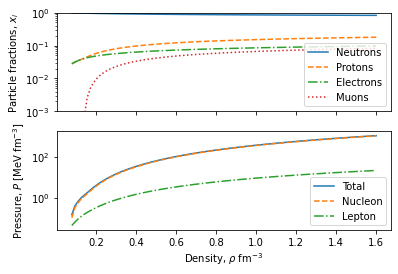

In [13]:
##############################################################################
# ADD CONTRIBUTIONS OF NUCLEONS, ELECTRONS AND MUONS
edens=edens_n + edens_l
press=p_nuc + p_lep

# EXPORTS DATA TO SCREEN
#fmt_out='{:11.6f} {:11.6f} {:11.6f} {:11.6f} {:11.6f} {:11.6f} {:11.6f} {:11.6f}'
#for iden,den in enumerate( numden ) :
#    print(fmt_out.format(edens[iden],press[iden],numden[iden]/rho0, \
#    numden[iden],xp[iden],xn[iden],x_el[iden],x_mu[iden]))

# PLOT PARTICLE FRACTIONS AS A FUNCTION OF DENSITY
fig, (ax1,ax2) = plt.subplots(2,sharex=True)
ax1.semilogy(numden,xn,label='Neutrons',lw=1.5)
ax1.semilogy(numden,xp,'--',lw=1.5,label='Protons')
ax1.semilogy(numden,x_el,'-.',lw=1.5,label='Electrons')
ax1.semilogy(numden,x_mu,':',lw=1.5,label='Muons')
ax1.legend(loc='lower right')
ax1.set_ylim([1e-3,1])
ax2.set(xlabel=r'Density, $ \rho $ fm$^{-3}$')
ax1.set(ylabel=r'Particle fractions, $x_i$')
ax2.set(ylabel=r'Pressure, $P$ [MeV fm$^{-3}$]')

# PLOT PRESSURE CONTRIBUTIONS
ax2.semilogy(numden,press,label='Total',lw=1.5)
ax2.semilogy(numden,p_nuc,'--',label='Nucleon',lw=1.5)
ax2.semilogy(numden,p_lep,'-.',label='Lepton',lw=1.5)
ax2.legend(loc='lower right')

plt.show()

# WRITING OUTPUT IN MR.dat FILE
#data_to_write = np.array( [edens[:],press[:],u[:]] ).T
#outputfile="EoS_HH.dat"
#with open(outputfile,"w+") as file_id :
#    np.savetxt(file_id,data_to_write,fmt=["%16.6E","%16.6E","%16.6E"],header="  eden [MeVfm-3]   Pres [MeVfm-3]     Den/0.16")

# BIBLIOGRAPHY
<a id='Silbar2003'></a> [Silbar2004] S. Silbar & S. Reddy, [American Journal of Physics 72, 892 (2004)](https://doi.org/10.1119/1.1703544); [nucl-th/0309041
](https://arxiv.org/abs/nucl-th/0309041).

<a id='Heiselberg2000'></a> [Heiselberg2000] H. Heiselberg & M. Hjorth-Jensen, [Physics Reports 328, 237 (2000)](https://doi.org/10.1016/S0370-1573(99)00110-6); [nucl-th/9902033](https://arxiv.org/abs/nucl-th/9902033).

<a id='Shapiro'></a> [Shapiro] Stuart L. Shapiro & Saul A. Teukolsky, 
*Black Holes, White Dwarfs, and Neutron Stars: The Physics of Compact Objects* (1983), ISBN 9780471873167;
[doi:10.1002/9783527617661](https://doi.org/doi:10.1002/9783527617661).

<a id='Haensel'></a> [Haensel] P. Haensel, A. Y. Potekhin & D. G. Yakovlev,
*Neutron Stars 1: Equation of State and Structure*
(2003),
ISBN 978-0-387-33543-8,
[doi:10.1007/978-0-387-47301-7](https://doi.org/10.1007/978-0-387-47301-7).